In [1]:
import numpy as np
import cv2 as cv

# 读取与存储图片

In [2]:
import numpy as np
import cv2 as cv
# 用灰度模式加载图像
img = cv.imread('opencv-logo-white.jpg', 0)
cv.imshow('image', img)
cv.imwrite('opencv-logo-white-grey.png',img)
cv.waitKey(0)
cv.destroyAllWindows()

# 使用 plot

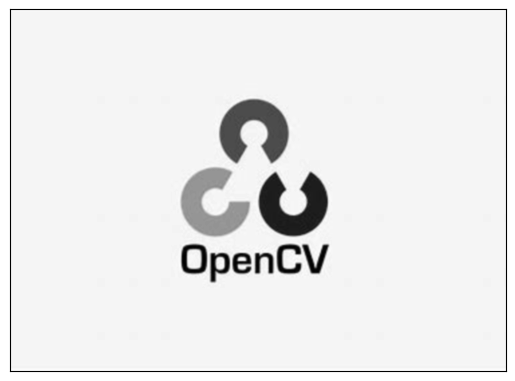

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('opencv-logo-white.jpg', 0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # 隐藏 X 和 Y 轴的刻度值
plt.show()


# 调用摄像头

In [4]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
print(cap.get(cv.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
ret = cap.set(cv.CAP_PROP_FRAME_WIDTH,1080) 
print(ret)
while(True):
    # 一帧一帧捕捉
    ret, frame = cap.read()
    # 我们对帧的操作在这里
    #gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # 显示返回的每帧
    cv.imshow('frame',frame)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
# 当所有事完成，释放 VideoCapture 对象
cap.release()
cv.destroyAllWindows()

640.0
480.0
True


# 存储视频

In [5]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
# 声明编码器和创建 VideoWrite 对象
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi',fourcc, 60.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv.flip(frame,0)
        # 写入已经翻转好的帧
        out.write(frame)
        cv.imshow('frame',frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
# 释放已经完成的工作
cap.release()
out.release()
cv.destroyAllWindows()


# 读取视频

In [6]:
import numpy as np
import cv2 as cv

# 从视频文件中读取帧
cap = cv.VideoCapture('output.avi')

# 检查视频是否成功打开
if not cap.isOpened():
    print("Error opening video file")

# 循环遍历视频帧
while(cap.isOpened()):
    # 读取帧
    ret, frame = cap.read()

    # 将帧转换为灰度图像
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # 显示灰度图像帧
    cv.imshow('frame',gray)

    # 按下 'q' 键退出循环
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# 释放视频对象和所有窗口
cap.release()
cv.destroyAllWindows()


# 画出特定的形状

In [7]:
import numpy as np
import cv2 as cv
# 创建一个黑色的图像
img = np.zeros((512,512,3), np.uint8)
# 画一条 5px 宽的蓝色对角线
cv.line(img,(0,0),(511,511),(255,0,0),5)

cv.rectangle(img,(384,0),(510,128),(0,255,0),3)

cv.circle(img,(447,63), 63, (0,0,255), -1)

cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

cv.imshow("draw",img)
cv.waitKey(0)
cv.destroyAllWindows()


# opencv处理鼠标事件

这个列表推导式使用了以下语法：

1. 列表推导式的一般形式为 **[expression for variable in iterable if condition]。**
2. 在这个例子中，expression 是 i，即返回当前迭代的属性名。
3. variable 是 i，即循环迭代过程中的变量名。
4. iterable 是 dir(cv)，即包含 cv 对象中所有属性和方法名称的列表。
5. condition 是 'EVENT' in i，即检查当前迭代的属性名 i 是否包含字符串 "EVENT"。

当满足条件 'EVENT' in i 时，表达式 i 会被加入列表中。
因此，这个列表推导式遍历 dir(cv) 中的所有元素，筛选出属性名中包含 "EVENT" 的元素，然后将它们存储在列表 events 中。

In [8]:
import cv2 as cv
events = [i for i in dir(cv) if 'EVENT' in i]
print( events )

# events = [
#     i            # 表达式，返回迭代过程中的属性名
#     for i in dir(cv)    # 迭代变量 i 取 dir(cv) 中的每个元素（即 cv 对象中的属性名）
#     if 'EVENT' in i     # 条件语句，筛选出包含 "EVENT" 的属性名
# ]


['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


## 实现双击画圆圈


In [9]:
import numpy as np
import cv2 as cv

# 鼠标回调函数
def draw_circle(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        # 在 (x,y) 处画一个蓝色的圆
        cv.circle(img,(x,y),100,(255,0,0),-1)

# 创建一个黑色图像，一个窗口，然后和回调绑定
img = np.zeros((512,512,3), np.uint8)  # 创建一个大小为 (512,512) 的黑色图像
cv.namedWindow('image')                # 创建一个名为 'image' 的窗口
cv.setMouseCallback('image',draw_circle)  # 将回调函数与窗口 'image' 绑定
help(cv.setMouseCallback)
help(cv.setMouseCallback)
# 进入窗口的循环
while(1):
    cv.imshow('image',img)  # 显示图像
    if cv.waitKey(1) & 0xFF == ord('q'):  # 按键检测，如果按下了 'q' 键，则退出循环
        break

cv.destroyAllWindows()  # 销毁所有窗口


Help on built-in function setMouseCallback in module cv2:

setMouseCallback(...)
    setMouseCallback(windowName, onMouse [, param]) -> None

Help on built-in function setMouseCallback in module cv2:

setMouseCallback(...)
    setMouseCallback(windowName, onMouse [, param]) -> None



In [10]:
import numpy as np
import cv2 as cv

drawing = False  # 标记是否正在绘制
mode = True  # True为矩形模式，False为曲线模式
ix, iy = -1, -1  # 起始坐标

# 鼠标回调函数
def draw_circle(event, x, y, flags, param):
    global ix, iy, drawing, mode

    if event == cv.EVENT_LBUTTONDOWN:  # 鼠标左键按下，开始绘制
        drawing = True
        ix, iy = x, y

    elif event == cv.EVENT_MOUSEMOVE:  # 鼠标移动，继续绘制
        if drawing == True:
            if mode == True:  # 矩形模式
                cv.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)  # 画矩形
            else:  # 曲线模式
                cv.circle(img, (x, y), 5, (0, 0, 255), -1)  # 画圆

    elif event == cv.EVENT_LBUTTONUP:  # 鼠标左键松开，结束绘制
        drawing = False
        if mode == True:
            cv.rectangle(img, (ix, iy), (x, y), (0, 255, 0), 3)  # 画矩形
        else:
            cv.circle(img, (x, y), 5, (0, 0, 255), -1)  # 画圆

img = np.zeros((512, 512, 3), np.uint8)  # 创建一张黑色画布
cv.namedWindow('image')  # 创建窗口并命名
cv.setMouseCallback('image', draw_circle)  # 设置鼠标回调函数

while(1):
    cv.imshow('image', img)  # 显示画布
    k = cv.waitKey(1) & 0xFF  # 获取键盘输入

    if k == ord('m'):  # 按下'm'切换模式
        mode = not mode
    elif k == 27:  # 按下ESC键退出
        break

cv.destroyAllWindows()  # 销毁窗口


## 作为调色板的跟踪栏
[:]: 这个符号用于Python中对整个数组进行切片操作。在这个例子中，我们使用它来设置图像的每个像素为一个特定的颜色。例如，img[:] = [b,g,r]将设置整个图像的每个像素为BGR值(b,g,r)。

In [11]:
import numpy as np
import cv2 as cv

# 定义一个空函数，用于作为cv.createTrackbar()的回调函数
def nothing(x):
    pass

# 创建一个黑色图像和一个窗口
img = np.zeros((300,512,3), np.uint8)
print(type(img))
cv.namedWindow('image')

# 创建三个轨迹条，用于改变图像的颜色
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)

# 创建一个开关，用于启用和关闭图像颜色的改变
switch = '0 : OFF \n 1 : ON'
cv.createTrackbar(switch, 'image',0,255,nothing)

while(1):
    # 显示图像
    cv.imshow('image',img)

    # 等待用户按下键盘按键
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

    # 获取当前轨迹条的值
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')

    # 根据开关的值决定是否修改图像的颜色
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

# 关闭窗口
cv.destroyAllWindows()


<class 'numpy.ndarray'>
